#### 0. Import basic methods from source.py
Import useful methods from source.py (NB: can later be integrated into a package)

In [1]:
from source import *

#### 1. Open xls file and ingest Inputs table
Note I am assuming that all inputs will be aggregated into one single inputs table

In [2]:
filename = r'H2 Model Wouter.xlsm'

In [3]:
%%time
# load workbook
wb = load_workbook(filename)

C:\Users\MRV\Anaconda3\envs\gdal\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


CPU times: total: 1min 12s
Wall time: 1min 13s


In [4]:
# load worksheet
ws = wb["Input Tab"]

In [5]:
mapping = {}

for entry, data_boundary in ws.tables.items():
    # parse the data within the ref boundary
    data = ws[data_boundary]
    
    # extract the data (the inner list comprehension gets the values for each cell in the table)
    content = [[cell.value for cell in ent] for ent in data]
    
    # find header
    header = content[0]
    
    # find the rest ... the contents, excluding the header
    rest = content[1:]
    
    # create dataframe with the column names
    # and pair table name with dataframe
    df = pd.DataFrame(rest, columns = header)
    mapping[entry] = df

In [6]:
Inputs = pd.DataFrame(mapping['Scenario1'])
Inputs.head()

,Category,Sub-system,Element,Component,Description,Number,Unit,Comments
0,System input,Wind energy source & Transport,Offshore wind park,-,Total Windpark Capacity,3000,MW,None
1,System input,Wind energy source & Transport,Offshore wind park,Turbine,Windturbine Capacity per unit,20,MW,None
2,System input,Wind energy source & Transport,Offshore wind park,Inter-array cable,Length,50,km,None
3,System input,AC Substation & Transport,AC Substation & Transport,AC Substation,Capacity per unit,2000,MW,None
4,System input,AC Substation & Transport,AC Substation & Transport,AC collection cable,Length,25,km,None


#### 2. Data inspection 

In [7]:
Inputs.columns

Index(['Category', 'Sub-system', 'Element', 'Component', 'Description',
       'Number', 'Unit', 'Comments'],
      dtype='object')

In [8]:
Inputs[Inputs['Category']=='System input']

,Category,Sub-system,Element,Component,Description,Number,Unit,Comments
0,System input,Wind energy source & Transport,Offshore wind park,-,Total Windpark Capacity,3000,MW,None
1,System input,Wind energy source & Transport,Offshore wind park,Turbine,Windturbine Capacity per unit,20,MW,None
2,System input,Wind energy source & Transport,Offshore wind park,Inter-array cable,Length,50,km,None
3,System input,AC Substation & Transport,AC Substation & Transport,AC Substation,Capacity per unit,2000,MW,None
4,System input,AC Substation & Transport,AC Substation & Transport,AC collection cable,Length,25,km,None
5,System input,Converter & Transport,Converter,HVDC Converter,Capacity per unit,3000,MW,None
6,System input,Converter & Transport,Converter,HVDC cable,Length,20,km,None
7,System input,"Electrolysis, Electricity & Transport",Electrolysis,Electrolyser,Stack size capacity,20,MW,None
8,System input,"Electrolysis, Electricity & Transport",Electricity,DCAC Converter,Capacity per unit,40,MW,None
9,System input,"Electrolysis, Electricity & Transport",Facility location,Artificial island,Footprint,100,m2/MW,None


In [9]:
list(Inputs['Sub-system'].unique())

['Wind energy source & Transport',
 'AC Substation & Transport',
 'Converter & Transport',
 'Electrolysis, Electricity & Transport',
 '-']

In [10]:
list(Inputs['Element'].unique())

['Offshore wind park',
 'AC Substation & Transport',
 'Converter',
 'Electrolysis',
 'Electricity',
 'Facility location',
 'Transport',
 '-']

In [11]:
list(Inputs['Component'].unique())

['-',
 'Turbine',
 'Inter-array cable',
 'AC Substation',
 'AC collection cable',
 'HVDC Converter',
 'HVDC cable',
 'Electrolyser',
 'DCAC Converter',
 'Artificial island',
 'Mainland',
 'H2 Pipeline',
 'Electricity cable',
 'HVDC Cable',
 'Foundation & cable',
 'DC collection cable',
 'Desalination unit',
 'Compressor unit',
 'Storage unit',
 'Compressor after storage']

#### 3. Select one item from the Inputs table (generate cashflow overview)

##### A. do per item

In [12]:
%time
df_Foundations = Inputs_2_cashflow(Inputs, 
                                   startyear=2000,
                                   lifecycle=11,
                                   subsystem='Wind energy source & Transport',
                                   element='Offshore wind park',
                                   component='Foundation & cable',
                                   Debug=True)
df_npv_Foundations = calculate_npv(df_Foundations)
df_npv_Foundations

CPU times: total: 0 ns
Wall time: 0 ns


'Construction items Foundation & cable: 1 units'

'CAPEX component Foundation & cable: 2691000 eu for 1 unit(s)'

'Construction duration Foundation & cable: 3 years'

'Construction allocation Foundation & cable: [0.4, 0.3, 0.3] per year'

'Economic Lifetime Foundation & cable: 50 years'

'Depreciation Flag Foundation & cable: 1'

'Yearly Variable Costs Flag Foundation & cable: 1'

'Yearly Variable Costs Rate Foundation & cable: 0.03'

'Insurance Flag Foundation & cable: 1'

'Insurance Rate Foundation & cable: 0.005'

'Decommissioning Foundation & cable: 0.02'

'Residual Value Foundation & cable: 0.01'

'OPEX component Foundation & cable: 94184.99999999999 eu for 1 unit(s)'

'Revenue Foundation & cable: 0 euro/unit'

,years,capex,opex,revenue,cashflow,cashflow_sum,npv,npv_sum
years,,,,,,,,
2000,2000,0,0.0,0,0.0,0.0,0.000000e+00,0.000000e+00
2001,2001,-1076400,0.0,0,-1076400.0,-1076400.0,-1.005981e+06,-1.005981e+06
2002,2002,-1076400,0.0,0,-1076400.0,-2152800.0,-9.401694e+05,-1.946151e+06
2003,2003,-1076400,0.0,0,-1076400.0,-3229200.0,-8.786630e+05,-2.824814e+06
2004,2004,0,-94185.0,0,-94185.0,-3323385.0,-7.185329e+04,-2.896667e+06
2005,2005,0,-94185.0,0,-94185.0,-3417570.0,-6.715260e+04,-2.963820e+06
2006,2006,0,-94185.0,0,-94185.0,-3511755.0,-6.275944e+04,-3.026579e+06
2007,2007,0,-94185.0,0,-94185.0,-3605940.0,-5.865368e+04,-3.085233e+06
2008,2008,0,-94185.0,0,-94185.0,-3700125.0,-5.481653e+04,-3.140049e+06


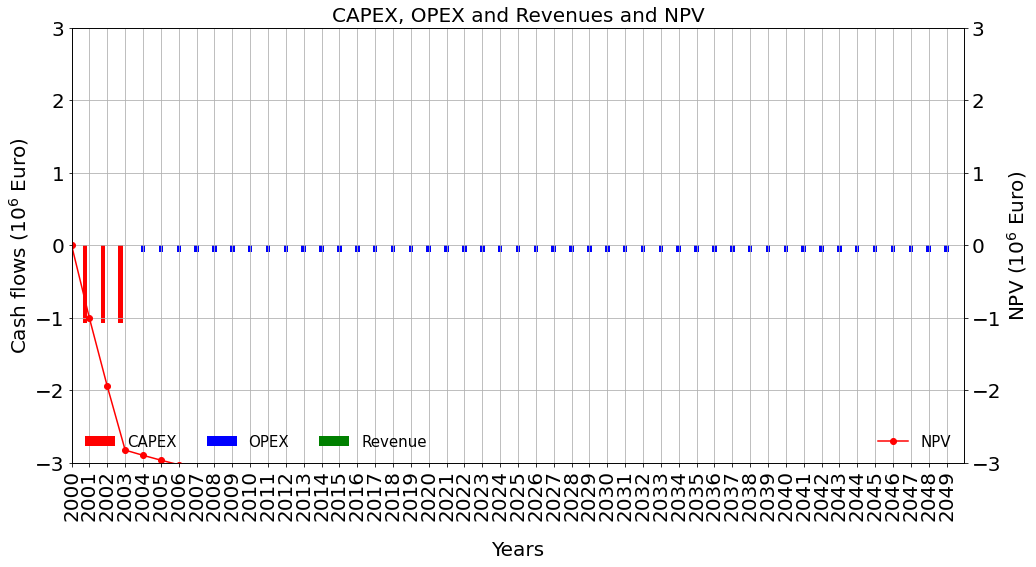

In [13]:
lims = [-3,3]
create_npv_plot(df_npv_Foundations, cash_flow_lims=lims, npv_lims=lims)

In [14]:
%time
df_Turbines = Inputs_2_cashflow(Inputs, 
                                   startyear=2000,
                                   lifecycle=11,
                                   subsystem='Wind energy source & Transport',
                                   element='Offshore wind park',
                                   component='Turbine',
                                   Debug=True)
df_npv_Turbines = calculate_npv(df_Turbines)

CPU times: total: 0 ns
Wall time: 0 ns


'Construction items Turbine: 1 units'

'CAPEX component Turbine: 1495000 eu for 1 unit(s)'

'Construction duration Turbine: 3 years'

'Construction allocation Turbine: [0.4, 0.3, 0.3] per year'

'Economic Lifetime Turbine: 50 years'

'Depreciation Flag Turbine: 1'

'Yearly Variable Costs Flag Turbine: 1'

'Yearly Variable Costs Rate Turbine: 0.03'

'Insurance Flag Turbine: 1'

'Insurance Rate Turbine: 0.005'

'Decommissioning Turbine: 0.02'

'Residual Value Turbine: 0.01'

'OPEX component Turbine: 52324.99999999999 eu for 1 unit(s)'

'Revenue Turbine: 0 euro/unit'

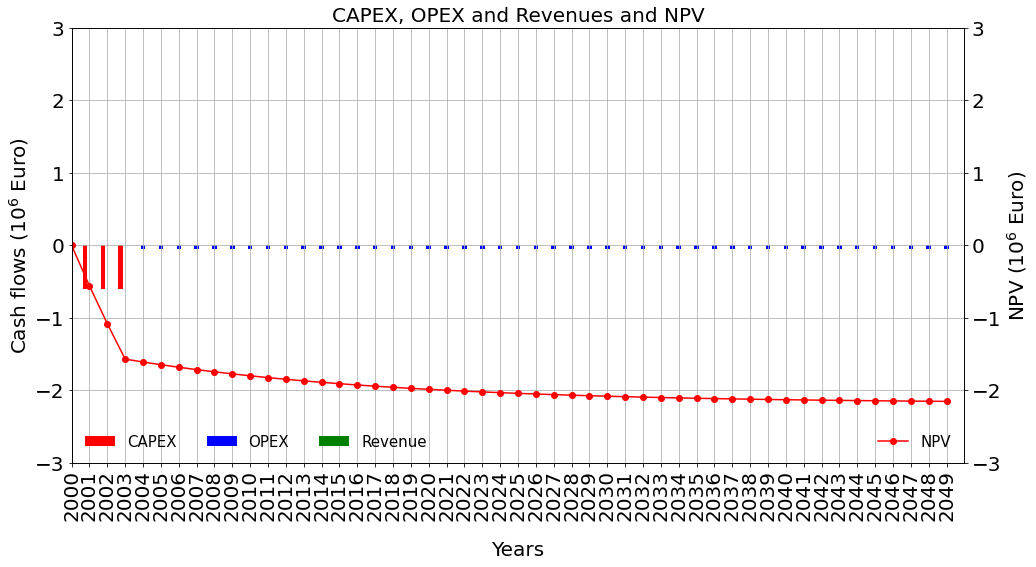

In [15]:
lims = [-3,3]
create_npv_plot(df_npv_Turbines, cash_flow_lims=lims, npv_lims=lims)

##### B. combine two items

In [16]:
df_Foundations = Inputs_2_cashflow(Inputs, startyear=2022, lifecycle=11, component='Foundation & cable',Debug=False)
df_Turbines = Inputs_2_cashflow(Inputs, startyear=2028, lifecycle=11, component='Turbine',Debug=False)
df_combined = combine_cashflow_dataframes([df_Foundations, df_Turbines])

In [17]:
df_npv_combined = calculate_npv(df_combined)

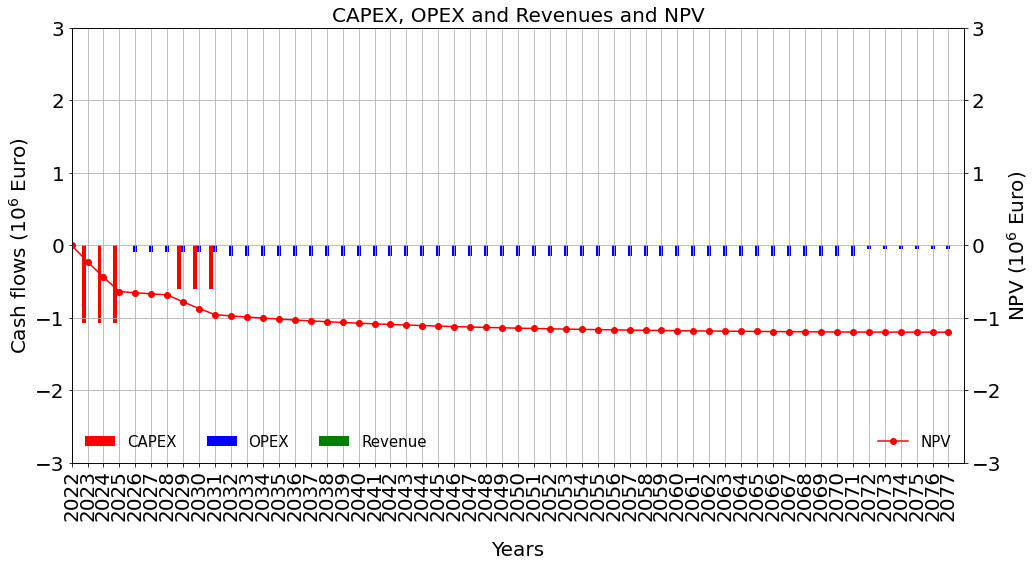

In [18]:
lims=[-3,3]
create_npv_plot(df_npv_combined, cash_flow_lims=lims, npv_lims=lims)